In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn import datasets

In [3]:
def load_data(filename):
    raw = np.genfromtxt(filename, delimiter=',')
    raw = raw[:, :-1]
    #print(raw)
    #print(raw.shape)
    return raw

In [4]:
def pre_ave_std(raw):
    ave = np.mean(raw, axis=0)
    std = np.std(raw, axis=0)
    de = []
    for i in range(raw.shape[0]):
        for j in range(raw.shape[1]):
            if (raw[i][j] > (ave[j] + 3 * std[j])) | (raw[i][j] < (ave[j] - 3 * std[j])):
                de.append(i)
                break
    preprocess = np.delete(raw, de, 0)
    print(preprocess.shape)
    return preprocess

In [4]:
# old
def pre_slope_std(raw):
    std = np.std(raw, axis=0)
    de = []
    for i in range(raw.shape[0] - 1):
        for j in range(raw.shape[1]):
            if abs(raw[i + 1][j] - raw[i][j]) > 3.5 * std[j] :
                de.append(i + 1)
                break
    preprocess = np.delete(raw, de, 0)
    print(preprocess.shape)
    return preprocess

In [5]:
# new
def pre_slope_std(raw):
    std = np.std(raw, axis=0)
    de = []
    i = 0
    i_max = raw.shape[0]
    i_flag = 0
    i_tf = False
    while i < i_max - 1:
        for j in range(raw.shape[1]):
            if abs(raw[i + 1][j] - raw[i_flag][j]) > 3 * std[j] :
                de.append(i + 1)
                i_tf = True
                break
        i = i + 1
        if not i_tf:
            i_flag = i
        i_tf = False
            
    preprocess = np.delete(raw, de, 0)
    #print(preprocess.shape)
    return preprocess

In [6]:
def draw(raw, preprocess):
    print(raw.shape, preprocess.shape)
    plt.figure(2, figsize=(20,16))
    plt.subplot(211)
    f1 = plt.plot(raw)
    plt.subplot(212)
    f2 = plt.plot(preprocess)

In [7]:
def pre_save(preprocess, dir_path, data_path):
    try:
        os.mkdir(dir_path, mode=0o775)
    except:
        print("dir exists!!")
    if os.path.exists(data_path):
        print("file exists!!")
    np.savetxt(data_path, preprocess, delimiter=",", fmt='%.4f')

In [8]:
def cap_save(preprocess, data_path):
    if os.path.exists(data_path):
        print("file exists!!")
    np.savetxt(data_path, preprocess, delimiter=",", fmt='%.4f')

(4732, 56) (4603, 56)


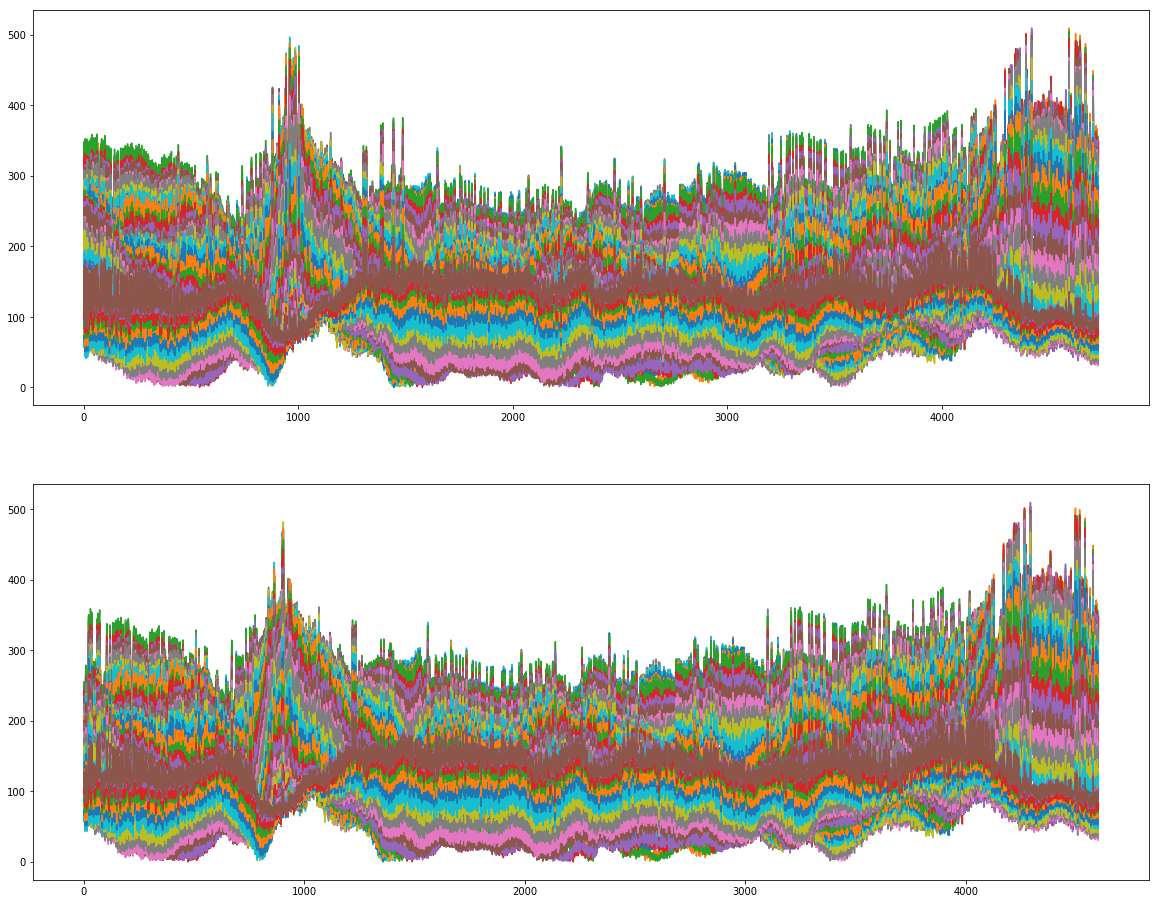

In [10]:
# test -- don't run
TX = 1
RX = 3
filename = "test/csv" + str(TX) + "x" + str(RX) + ".csv"
raw = load_data(filename)
preprocess = pre_slope_std(raw)
draw(raw, preprocess)

In [ ]:
f = plt.plot(raw[100:200])

(5059, 56) (4907, 56)


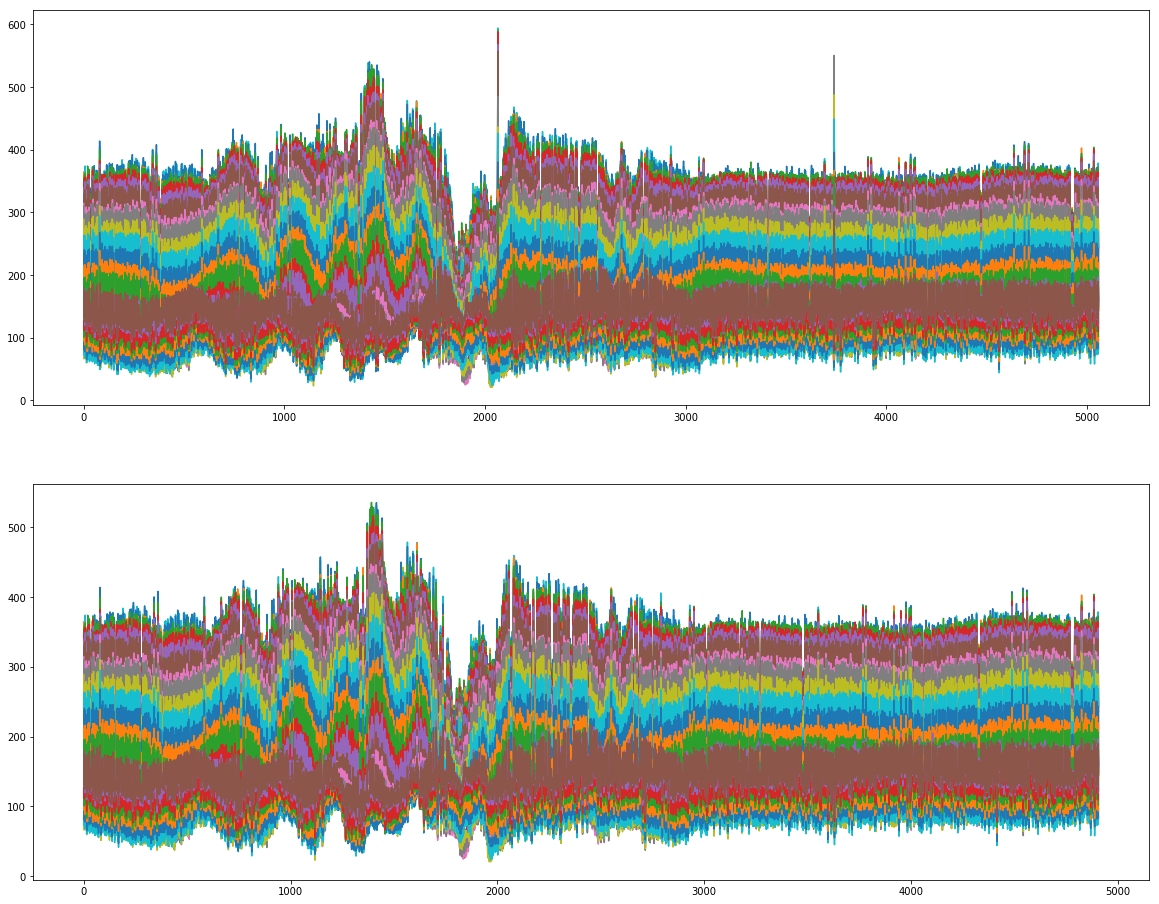

In [10]:
# data test -- don't run
TX = 1
RX = 3
data_num = 40
action = "fall"
filename = "data/" + action + "-" + str(data_num) + "/csv" + str(TX) + "x" + str(RX) + ".csv"
raw = load_data(filename)
preprocess = pre_slope_std(raw)
draw(raw, preprocess)

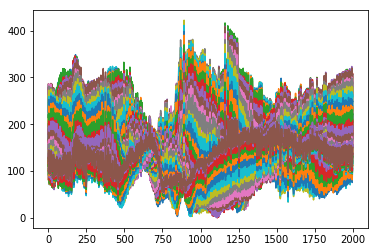

In [53]:
start = 2500
capture = preprocess[start : start+2000]
f = plt.plot(capture)

TypeError: float() argument must be a string or a number, not 'PCA'

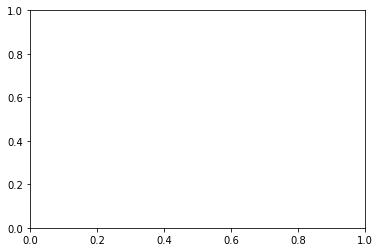

In [23]:
X=raw
pca=PCA(n_components=2)
pca.fit(X).transform(X)

In [14]:
pca.n_components_

2

In [15]:
pca.explained_variance_ratio_

array([0.78545196, 0.11160097])

In [16]:
np.cumsum(pca.explained_variance_ratio_)

array([0.78545196, 0.89705293])

In [55]:
for TX in range(1, 3):
    print("TX:", TX)
    filename = "data/" + action + "-" + str(data_num) + "/csv" + str(TX) + "x" + str(RX) + ".csv"
    data_path = "capture/" + action + "-" + str(data_num)  + "-" + str(TX) + ".csv"
    raw = load_data(filename)
    preprocess = pre_slope_std(raw)
    capture = preprocess[start : start+2000]
    cap_save(capture, data_path)
#data_path = "capture/" + action + "-" + str(data_num)  + "-" + str(TX) + ".csv"
#cap_save(capture, data_path)

TX: 1
TX: 2


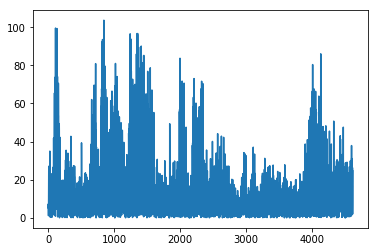

In [58]:
a =[]
for i in range(len(raw)-1):
    a.append(abs(raw[i,20]-raw[i+1,20]))
p = plt.plot(a)

In [14]:
# 單筆資料處理
TX = 1
RX = 3
# test folder
#filename = "test/csv" + str(TX) + "x" + str(RX) + ".csv"
# data folder
date = "0708"
action = "stand"
test_id = 2
filename = "data/" + date + "/" + action + "-" + str(test_id) + "/csv" + str(TX) + "x" +str (RX) + ".csv"
dir_path = "preprocess/" + date + "/" + action + "-" + str(test_id)
data_path = "preprocess/" + date + "/" + action + "-" + str(test_id) + "/csv" + str(TX) + "x" +str (RX) + ".csv"

In [ ]:
raw = load_data(filename)
preprocess = pre_slope_std(raw)
draw(raw, preprocess)
pre_save(preprocess, dir_path, data_path)

In [ ]:
# 連續處理
num_data = 20
RX = 3
date = "0708"
action = "stand"
for test_id in range(1, num_data + 1):
    print("id:", test_id)
    for TX in range(1, 3):
        filename = "data/" + date + "/" + action + "-" + str(test_id) + "/csv" + str(TX) + "x" +str (RX) + ".csv"
        dir_path = "preprocess/" + date + "/" + action + "-" + str(test_id)
        data_path = "preprocess/" + date + "/" + action + "-" + str(test_id) + "/csv" + str(TX) + "x" +str (RX) + ".csv"
        raw = load_data(filename)
        preprocess = pre_slope_std(raw)
        #draw(raw, preprocess)
        pre_save(preprocess, dir_path, data_path)
